In [1]:
import pandas
import pandas as pd
from datascience_core.data_retrieval import ProjectDatasetManager

C:\Users\Colin.Hanley\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [8]:
dataset_manager = ProjectDatasetManager("affiliate_suppression")

In [158]:
datasets = dataset_manager.load_datasets("affiliate_suppression_May-23_6months_eda")

pulling dataset affiliate_suppression_May-23_6months_eda


In [159]:
#create pandas dataframe from affiliate leads
affiliate_leads = datasets["affiliate_suppression_May-23_6months_eda"]

affiliate_leads.columns = map(str.lower, affiliate_leads.columns)
for column in ["amounttofinance","netmonthlyincome","yearsatemployment","monthsatemployment","yearsatresidentialaddress","monthsatresidentialaddress"]:
    affiliate_leads[column] = pd.to_numeric(affiliate_leads[column], errors='coerce')


In [ ]:
"""
Notes to far:

Distinct Columns not usefull for modelling / Eda:
LoanApplicationID
EmailAddess

Columns to be scaled / in bins:

Bins: DONE
AmounTofinance
NetMonthlyIncome
Years at Employment
Months at Employment
Years at Home
Months at Employment

Id's That need to be mapped:
maritalstatusid
DrivingLicenceTypeId
TitleId
employmentstatusid

Columns with interesting engineering possibilities:
Occupation - Classification based on industry ? Clustering based on occupation ?
Residential Postcode - Classification based on area ? Clustering based on postcode ?
residentialstatusname


Need to do some correlation plots with acceptance.
Alot of the other stuff seems mid at best?

"""

In [224]:
affiliate_leads

,loanapplicationid,cashdeposit,amounttofinance,maritalstatusid,emailaddress,drivinglicencetypeid,titleid,netmonthlyincome,employmentstatusname,employmentstatusid,...,iswrittenagreement,isdocout,isapproval,unnamed: 46,unnamed: 47,unnamed: 48,amount_to_finance_buckets,net_monthly_income_buckets,years_at_employment_buckets,years_at_residential_address_buckets
0,13386755,NaN,11500.0,25.0,ileanamihali25@gmail.com,35.0,4.0,2400.0,Employed Full Time,1.0,...,False,False,False,NaN,NaN,NaN,10001-15000,2001-2500,1-3,1-3
1,13386756,NaN,14000.0,24.0,benjmatthews98@gmail.com,35.0,1.0,1800.0,Employed Full Time,1.0,...,False,False,True,NaN,NaN,NaN,10001-15000,1501-2000,0,8-10
2,13386757,NaN,14000.0,24.0,jamilraja94@googlemail.com,35.0,1.0,4000.0,Employed Full Time,1.0,...,False,False,True,NaN,NaN,NaN,10001-15000,3501-4000,1-3,1-3
3,13386758,NaN,8500.0,28.0,suttonangela@yahoo.com,35.0,2.0,1200.0,Not Employed,5.0,...,False,False,False,NaN,NaN,NaN,5001-10000,1001-1500,0,8-10
4,13386759,NaN,8500.0,23.0,mpritch85@outlook.com,35.0,2.0,1250.0,Employed Full Time,1.0,...,False,False,True,NaN,NaN,NaN,5001-10000,1001-1500,8-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769130,13555922,NaN,10000.0,NaN,adin.p1980@gmail.com,NaN,3.0,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,5001-10000,60000+,10+,11+
769131,12911025,NaN,6500.0,NaN,chris119944@icloud.com,NaN,1.0,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,5001-10000,60000+,10+,1-3
769132,13245628,NaN,10000.0,24.0,brendanoconnor@live.co.uk,NaN,1.0,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,5001-10000,60000+,10+,1-3
769133,13029376,NaN,5000.0,NaN,naida_hussain@icloud.com,NaN,2.0,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,0-5000,60000+,10+,4-7


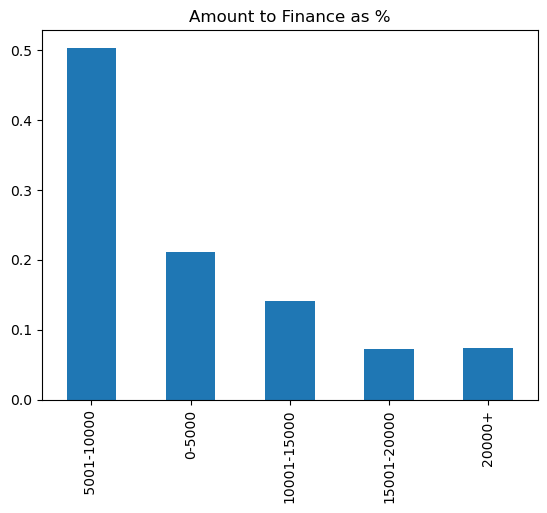

In [186]:
from numpy import float64

finance_ranges = {
    5000: "0-5000",
    10000: " 5001-10000",
    15000: "10001-15000",
    20000: "15001-20000"}

def map_amount_to_finance_buckets(amount):
    for limit, bucket in finance_ranges.items():
        if float64(amount) <= limit:
            return bucket
    return "20000+"

affiliate_leads["amounttofinance"].map(map_amount_to_finance_buckets).value_counts(normalize=True).sort_index().plot(kind='bar', title="Amount to Finance as %")
affiliate_leads["amount_to_finance_buckets"] = affiliate_leads["amounttofinance"].map(map_amount_to_finance_buckets)

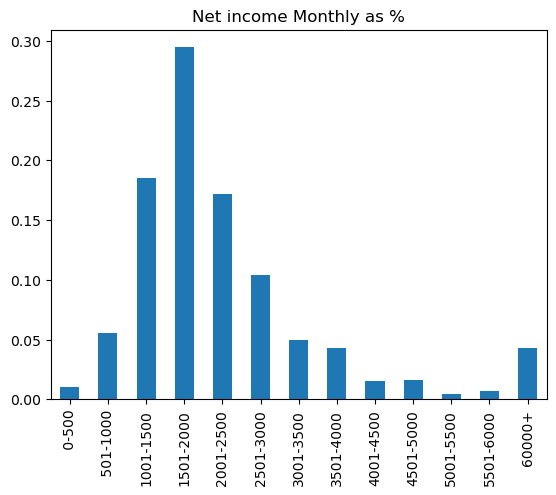

In [187]:
from numpy import float64

income_ranges = {
    500: " 0-500",
    1000: " 501-1000",
    1500: "1001-1500",
    2000: "1501-2000",
    2500: "2001-2500",
    3000: "2501-3000",
    3500: "3001-3500",
    4000: "3501-4000",
    4500: "4001-4500",
    5000: "4501-5000",
    5500: "5001-5500",
    6000: "5501-6000",}

def map_income_buckets(amount):
    for limit, bucket in income_ranges.items():
        if float64(amount) <= limit:
            return bucket
    return "60000+"

#visualize income buckets
affiliate_leads["netmonthlyincome"].map(map_income_buckets).value_counts(normalize=True).sort_index().plot(kind='bar', title="Net income Monthly as %")
affiliate_leads["net_monthly_income_buckets"] = affiliate_leads["netmonthlyincome"].map(map_income_buckets)

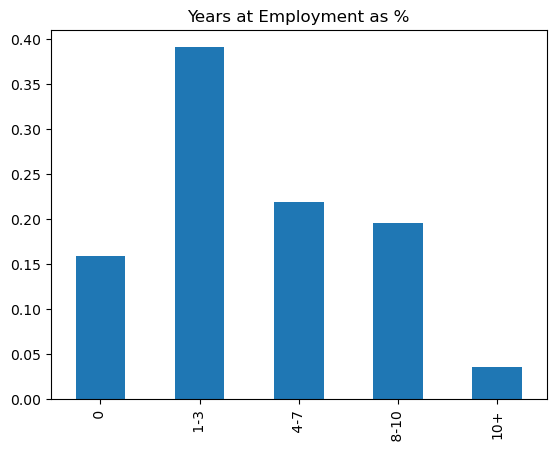

In [188]:
from numpy import float64

employment_ranges = {
    0: " 0",
    3: " 1-3",
    7: " 4-7",
    10: " 8-10"}

def map_employment_buckets(amount):
    for limit, bucket in employment_ranges.items():
        if float64(amount) <= limit:
            return bucket
    return "10+"
#visualize income buckets
affiliate_leads["yearsatemployment"].map(map_employment_buckets).value_counts(normalize=True).sort_index().plot(kind='bar', title="Years at Employment as %")
affiliate_leads["years_at_employment_buckets"] = affiliate_leads["yearsatemployment"].map(map_employment_buckets)

<Axes: title={'center': 'Months at Employment as %'}>

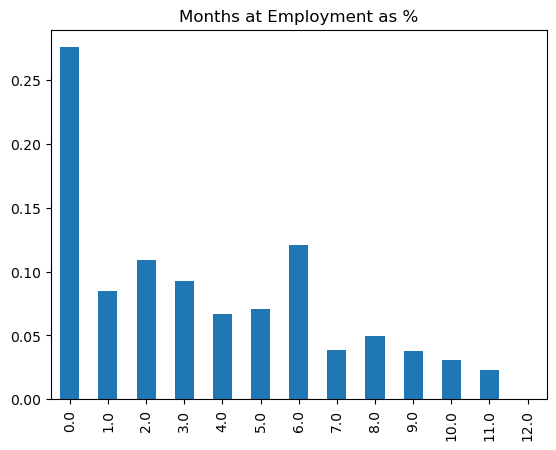

In [205]:
affiliate_leads[affiliate_leads["monthsatemployment"] > 12] = 0
affiliate_leads["monthsatemployment"].value_counts(normalize=True).sort_index().plot(kind='bar', title="Months at Employment as %")

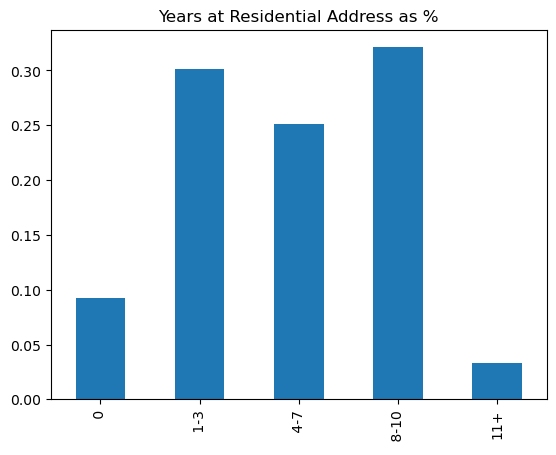

In [223]:
from numpy import float64

years_at_resident = {
    0: " 0",
    3: " 1-3",
    7: " 4-7",
    10: " 8-10"}

def map_years_at_home(amount):
    for limit, bucket in years_at_resident.items():
        if float64(amount) <= limit:
            return bucket
    return "11+"

affiliate_leads["yearsatresidentialaddress"].map(map_years_at_home).value_counts(normalize=True).sort_index().plot(kind='bar', title="Years at Residential Address as %")
affiliate_leads["years_at_residential_address_buckets"] = affiliate_leads["yearsatresidentialaddress"].map(map_years_at_home)

<Axes: title={'center': 'Years at Residential Address'}>

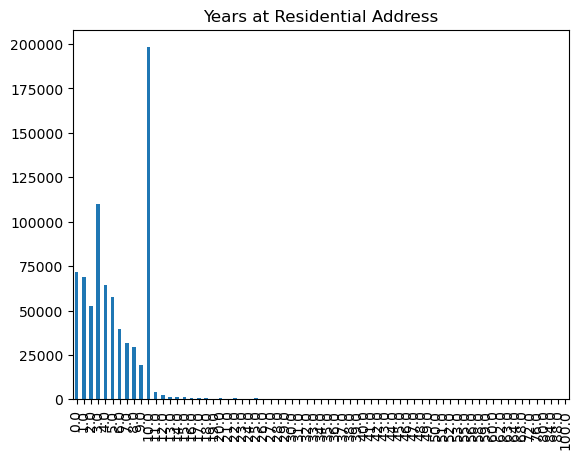

In [222]:
affiliate_leads["yearsatresidentialaddress"].value_counts().sort_index().plot(kind='bar', title="Years at Residential Address")

<Axes: title={'center': 'Months at Residential Address as %'}>

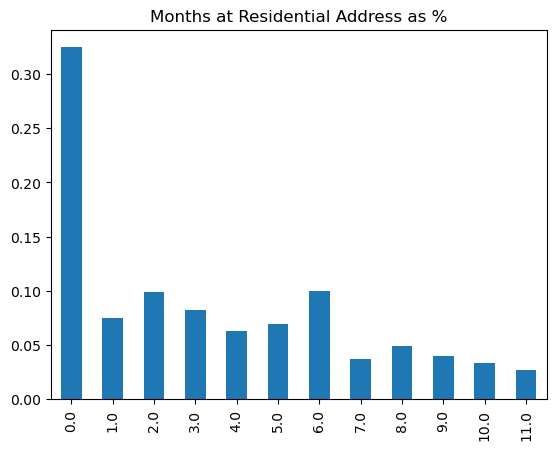

In [219]:
affiliate_leads[affiliate_leads["monthsatresidentialaddress"] >= 12] = 0
affiliate_leads["monthsatresidentialaddress"].value_counts(normalize=True).sort_index().plot(kind='bar', title="Months at Residential Address as %")

In [64]:
data = affiliate_leads.drop(columns = ["emailaddress","loanapplicationid"])

C:\Users\Colin.Hanley\AppData\Local\Temp\ipykernel_26928\114006630.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append(chunk_stats)


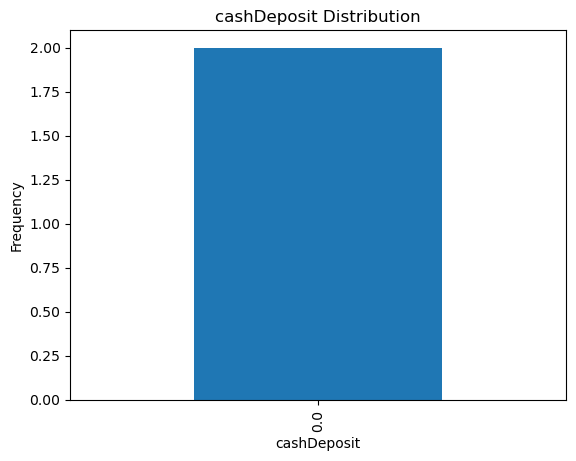

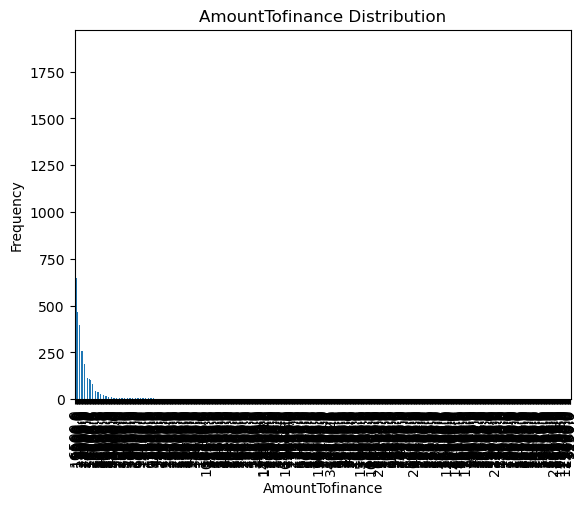

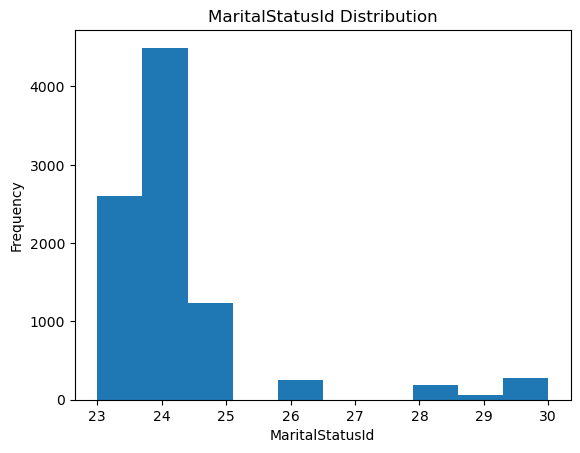

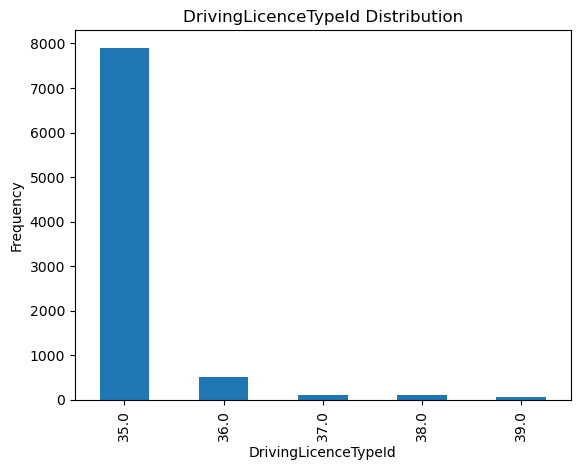

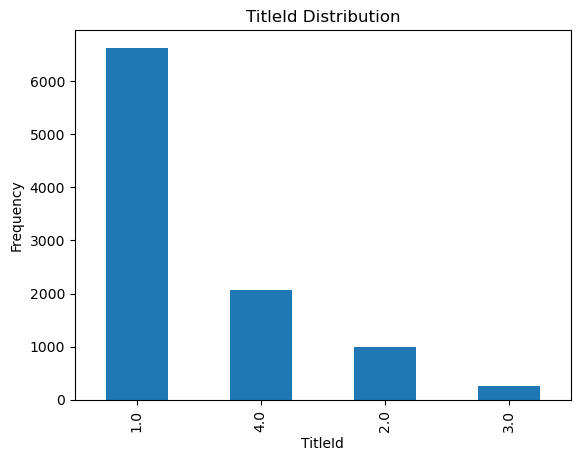

KeyboardInterrupt: 

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is already loaded into a DataFrame called 'data'

# Set the chunk size for processing
chunk_size = 10000

# Get the total number of chunks
total_chunks = len(data) // chunk_size + 1

# Initialize empty dataframes for summary statistics and visualizations
summary_stats = pd.DataFrame()
column_visuals = {}

# Iterate over the chunks
for i in range(total_chunks):
    # Calculate the start and end indices for the chunk
    start_idx = i * chunk_size
    end_idx = start_idx + chunk_size

    # Get the chunk of data
    chunk = data.iloc[start_idx:end_idx]

    # Perform summary statistics for each chunk
    chunk_stats = chunk.describe()
    summary_stats = summary_stats.append(chunk_stats)

    # Generate visualizations for each column in the chunk
    for column in chunk.columns:
        if column not in column_visuals:
            column_visuals[column] = plt.figure()

        # Create visualizations based on the data type of the column
        if chunk[column].dtype == 'object':
            # For categorical data, create a bar chart
            plt.figure(column_visuals[column].number)
            chunk[column].value_counts().plot(kind='bar')
            plt.title(f"{column} Distribution")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()
        else:
            # For numeric data, create a histogram
            plt.figure(column_visuals[column].number)
            chunk[column].plot.hist()
            plt.title(f"{column} Distribution")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()

# Consolidate and display summary statistics
final_stats = summary_stats.groupby(summary_stats.index).mean()
print(final_stats)

# Save or display column visuals as needed
for column, visual in column_visuals.items():
    visual.savefig(f"{column}_visualization.png")


In [71]:
# make all columns lowercase
affiliate_leads.columns = map(str.lower, affiliate_leads.columns)

In [123]:
for column in ["amounttofinance","netmonthlyincome","yearsatemployment","monthsatemployment","yearsatresidentialaddress","monthsatresidentialaddress"]:
    affiliate_leads[column] = pd.to_numeric(affiliate_leads[column], errors='coerce')

<Axes: title={'center': 'Amount to Finance as %'}>

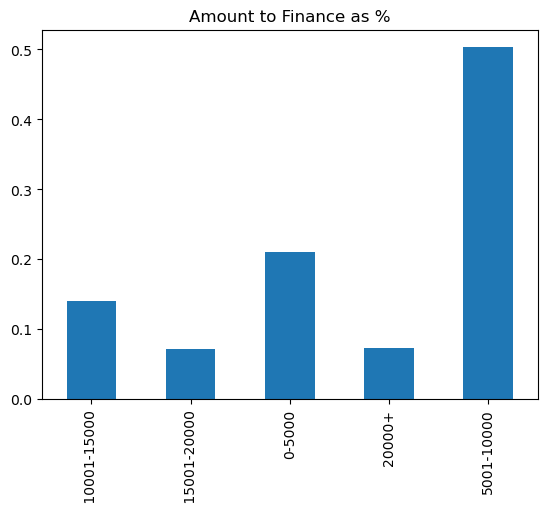

In [124]:
from numpy import float64

finance_ranges = {
    5000: "0-5000",
    10000: "5001-10000",
    15000: " 10001-15000",
    20000: " 15001-20000"}

def map_amount_to_finance_buckets(amount):
    for limit, bucket in finance_ranges.items():
        if float64(amount) <= limit:
            return bucket
    return "20000+"

affiliate_leads["amounttofinance"].map(map_amount_to_finance_buckets).value_counts(normalize=True).sort_index().plot(kind='bar', title="Amount to Finance as %")

<Axes: title={'center': 'Net Monthly Income as %'}>

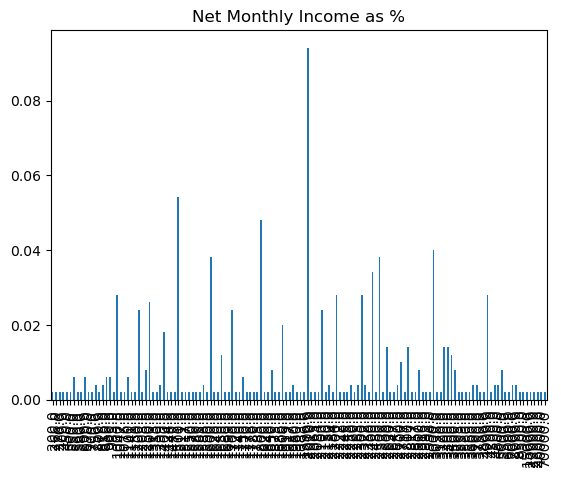

In [127]:
affiliate_leads["netmonthlyincome"][0:500].value_counts(normalize=True).sort_index().plot(kind='bar', title="Net Monthly Income as %")

<Axes: title={'center': 'Net Monthly Income as %'}>

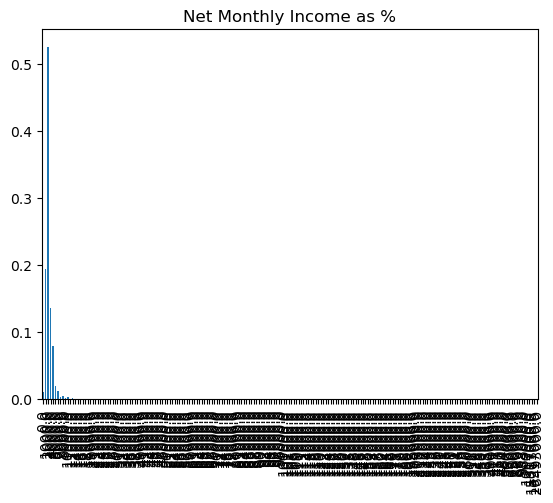

In [131]:
#round affiliate leads net monthly income to nearest 1000
affiliate_leads["netmonthlyincome"].map(lambda x: round(x, -3)).value_counts(normalize=True).sort_index().plot(kind='bar', title="Net Monthly Income as %")